<a href="https://colab.research.google.com/github/mkundhal/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Mandeep_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. 
Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a 
crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, 
understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services 
and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Explore and analyze the data to discover key understandings (not limited to these) such as :

1.   What can we learn about different hosts and areas?
2.   What can we learn from predictions? (ex: locations, prices, reviews, etc)
3.   Which hosts are the busiest and why?
4.   Is there any noticeable difference of traffic among different areas and what could be the reason for it?







In [1]:
!pip install git+git://github.com/geopandas/geopandas.git


  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-2e2scts7
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-2e2scts7
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 52.3 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.2+7.g17fe21e-py2.py3-none-any.whl size=1031740 sha256=2419d0e514f0634e1fd1e8d2276bde475954d1ed53f8ad8b00ac7fb8d66cfd64
  Stored in directory: /tmp/pip-ephem-wheel-cache-87m5zizt/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas


In [2]:
#import the important library files to perform action on dataframes and for plotting graphs
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns 
import geopandas


In [3]:
#mounted the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#read the database file from mounted google drive into dataframe df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_data Science /Module 1_Python/Pandas_Data/Airbnb NYC 2019.csv')

In [5]:
#Display first 5 rows of the dataframe to understand the information present in the database
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From Above we come to know that 10 thousand reviews are not given or missing . Also few name and hostname are missing 


In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From above data we can say the average price of the room is around 153 and the average minimum nights stay is 7.
Host listing count on a average is 7.
Availabilty_365 : 113.

In [9]:
df.nunique()


id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

No of locations are 5 and Type of rooms are 3

In [10]:
df.duplicated().sum()

0

Check for duplicate rows in the dataframe

In [15]:
df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

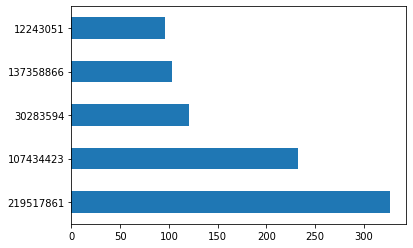

In [14]:

df.host_id.value_counts().iloc[:5].plot(kind='barh')


In [ ]:
 Host id 219517861 listed or booked was 327 which is is highest followed by the others 

## **Type of rooms preferred by the people**

In [16]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

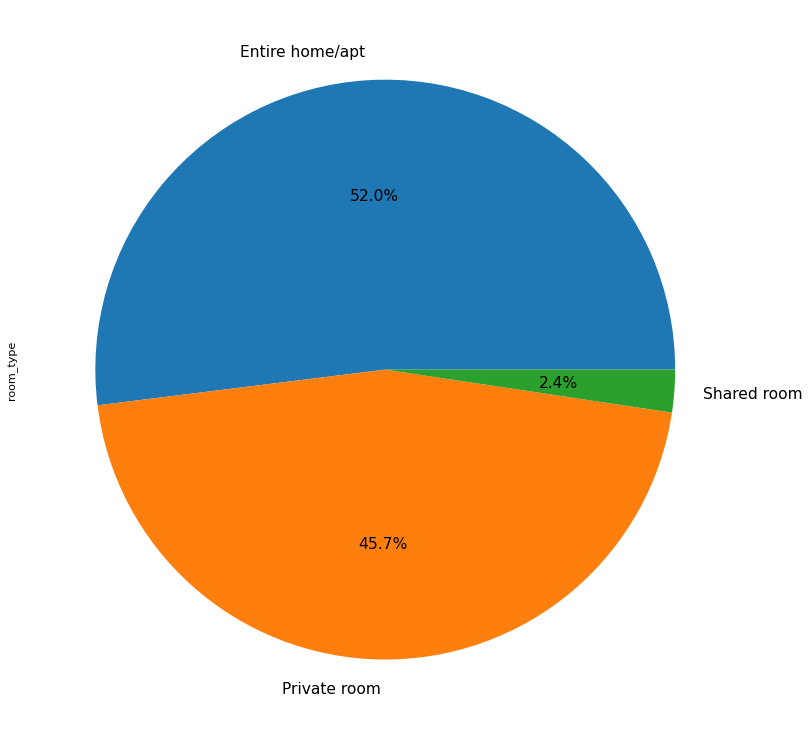

In [27]:
plt.figure(figsize=(12,12), dpi=80)

df['room_type'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=360,fontsize=14 )

From this we realise that customers prefer living in Apartment or private rooms instead of shared rooms

## **Neighbhourhood Groups  (Location)**

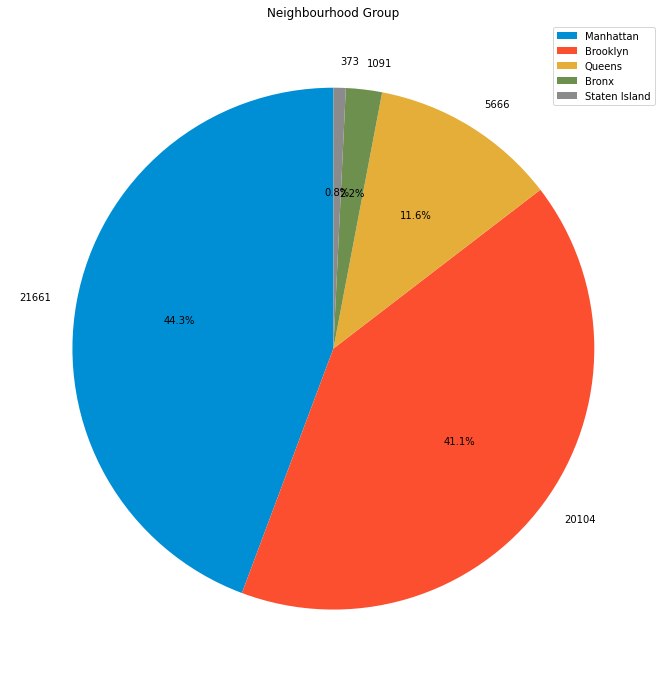

In [25]:
labels = df.neighbourhood_group.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0,0,0,0,0)
shape = df.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

From above data we come to know that manthan Manhattan and Brooklyn	are favorite locations to vist

In [ ]:
#understand the type of data in each column and non null value count in each column 
df.dropna(subset = ['last_review', 'reviews_per_month'],inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


  **No of host in each neighbourhood_group**



In [ ]:
#converted the object type column into string to perform action 
df["neighbourhood_group"]=df["neighbourhood_group"].astype('string')
df["neighbourhood"]=df["neighbourhood"].astype('string')
df.info()
df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  string 
 5   neighbourhood                   38843 non-null  string 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


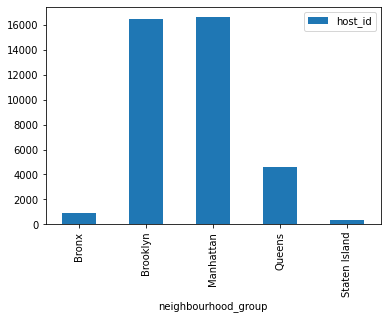

In [ ]:
 #plotted the no of host in each neighbourhood group  
 df.groupby(['neighbourhood_group']).count().plot(kind='bar',y='host_id')
 #this shows that no of host are more in Brooklyn and Manhattan and assume that these are favourite destination for travellers 

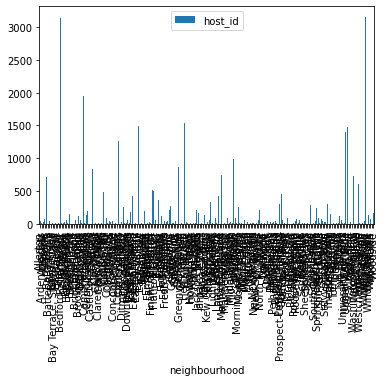

In [ ]:


df.groupby(['neighbourhood']).count().plot(kind='bar',y='host_id')

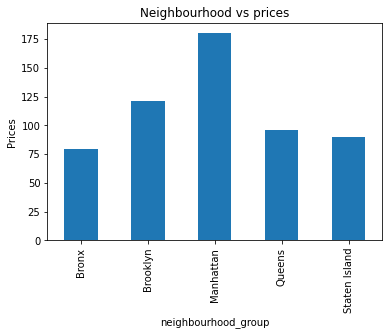

In [ ]:
df.groupby(['neighbourhood_group']) ['price'].mean().plot(kind="bar", ylabel='Prices', title='Neighbourhood vs prices')

    

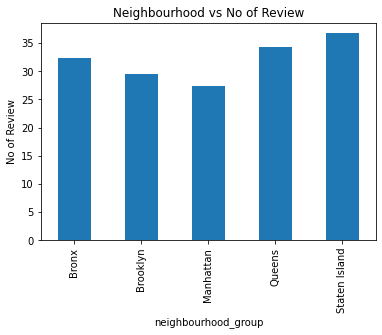

In [ ]:
df.groupby(['neighbourhood_group']) ['number_of_reviews'].mean().plot(kind="bar", ylabel='No of Review', title='Neighbourhood vs No of Review')


In [ ]:
df_high_availability = df.sort_values(by=['reviews_per_month'], ascending=[False])
df_high_availability

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,268481,Resort-like living in Williamsburg,1380703,Vishal,Brooklyn,Williamsburg,40.71647,-73.93974,Entire home/apt,290,30,1,2013-09-24,0.01,1,0
783,281521,Amazing West Village 2br,70614,Vimal,Manhattan,West Village,40.73879,-74.00425,Entire home/apt,200,27,1,2012-10-02,0.01,1,0
798,285442,Huge room with private balcony,1475866,Jesper,Manhattan,East Village,40.73119,-73.98819,Private room,300,6,1,2013-05-06,0.01,1,0
1575,714075,Room in Clinton Hill Brooklyn Loft,3597769,Enid,Brooklyn,Bedford-Stuyvesant,40.68712,-73.95876,Private room,75,5,1,2013-08-08,0.01,2,0


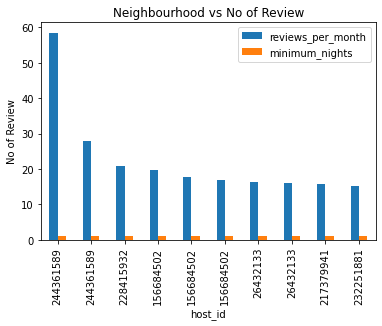

In [ ]:
df_high_availability.head(10).plot(kind="bar", x='host_id', y=['reviews_per_month','minimum_nights'],ylabel='No of Review', title='Neighbourhood vs No of Review')

In [ ]:
df['neighbourhood_group'].unique()

<StringArray>
['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Length: 5, dtype: string

In [ ]:
top_host_id = df['host_id'].value_counts().head(10)
top_host_id

219517861    207
61391963      79
16098958      61
137358866     51
7503643       49
190921808     46
30283594      43
1475015       42
120762452     40
2119276       39
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '61391963'),
 Text(0, 0, '16098958'),
 Text(0, 0, '137358866'),
 Text(0, 0, '7503643'),
 Text(0, 0, '190921808'),
 Text(0, 0, '30283594'),
 Text(0, 0, '1475015'),
 Text(0, 0, '120762452'),
 Text(0, 0, '2119276')]

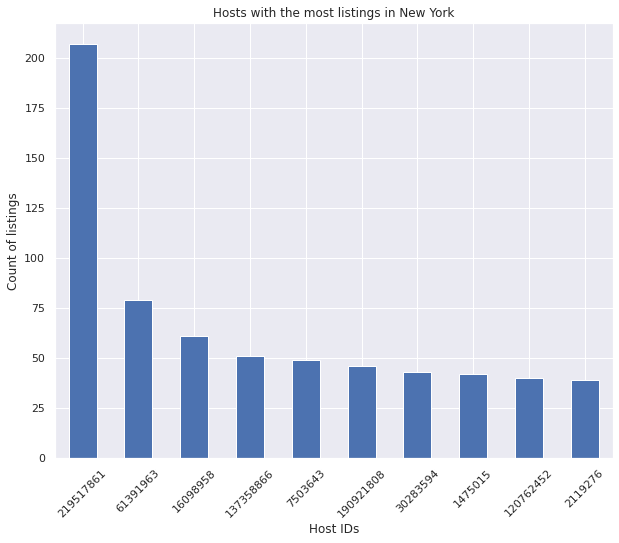

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})

top_host_id_plot = top_host_id.plot(kind='bar')
top_host_id_plot.set_title('Hosts with the most listings in New York')
top_host_id_plot.set_xlabel('Host IDs')
top_host_id_plot.set_ylabel('Count of listings')
top_host_id_plot.set_xticklabels(top_host_id_plot.get_xticklabels(), rotation=45)

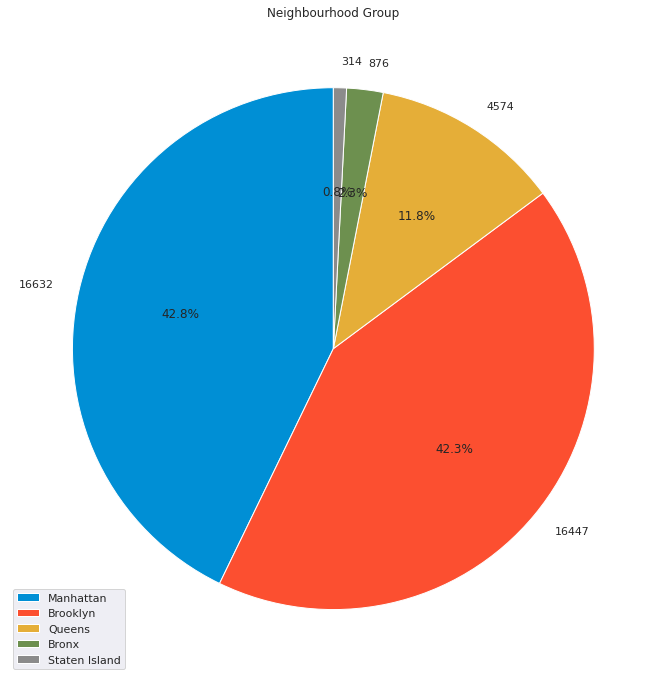

In [ ]:
labels = df.neighbourhood_group.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0,0,0,0,0)
shape = df.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

In [ ]:

nybb = geopandas.read_file(geopandas.datasets.get_path("nybb"))
nybb.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
